In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('../data/train_processed.csv', header=0)
test = pd.read_csv('../data/test_processed.csv', header=0)

In [46]:
sampling = pd.read_csv('../data/samplingResults.csv', header=0)
ensemble = pd.read_csv('../data/metricsEnsembleTabNet.csv', header=0)
pca = pd.read_csv('../data/pcaResults.csv', index=['Sampling Technique','Precision','Recall','F1 Score','Accuracy','Confusion Matrix'])

TypeError: read_csv() got an unexpected keyword argument 'index'

In [40]:
print(train.shape, test.shape)

(136429, 264) (90954, 263)


In [41]:
metrics_df = sampling.append(ensemble).drop(8)

In [42]:
metrics_df = metrics_df.append(pca)
metrics_df

,Sampling Technique,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,1,GBT,0.9909880490551319,0.9902514109799897,0.9905679578911469,0.9902514109799897.1,[[26684 164]\n [ 102 336]]
0,Smote-RFC,0.994581,0.994796,0.994634,0.994796,[[26803 45]\n [ 97 341]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Undersampled-RFC,0.986038,0.956534,0.968097,0.956534,[[25714 1134]\n [ 52 386]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Resampled-RFC,0.994689,0.994906,0.994731,0.994906,[[26807 41]\n [ 98 340]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Smote-GBT,0.994060,0.994283,0.994134,0.994283,[[26792 56]\n [ 100 338]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Undersampled-GBT,0.985960,0.963608,0.972311,0.963608,[[25923 925]\n [ 68 370]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Resampled-GBT,0.994060,0.994283,0.994134,0.994283,[[26792 56]\n [ 100 338]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Undersampled-LGBM,0.994060,0.994283,0.994134,0.994283,[[26792 56]\n [ 100 338]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Smote-LGBM,0.994340,0.994539,0.994407,0.994539,[[26794 54]\n [ 95 343]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Resampled-LGBM,0.994244,0.994429,0.994312,0.994429,[[26790 58]\n [ 94 344]],NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,VotingClassifier,0.996271,0.996286,0.996058,0.996286,[[20138 2]\n [ 74 251]],NaN,NaN,NaN,NaN,NaN,NaN,NaN


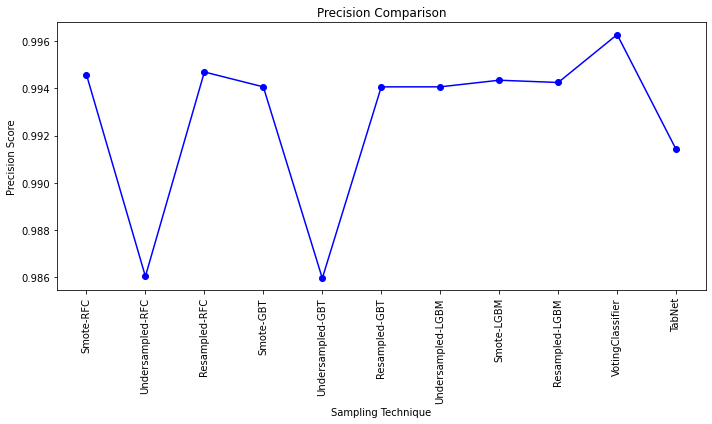

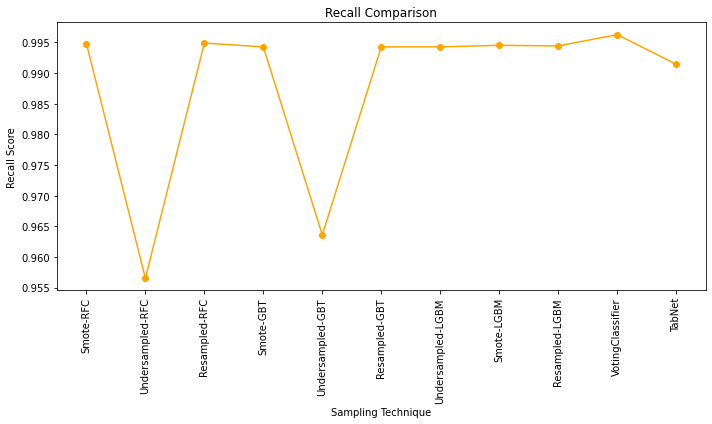

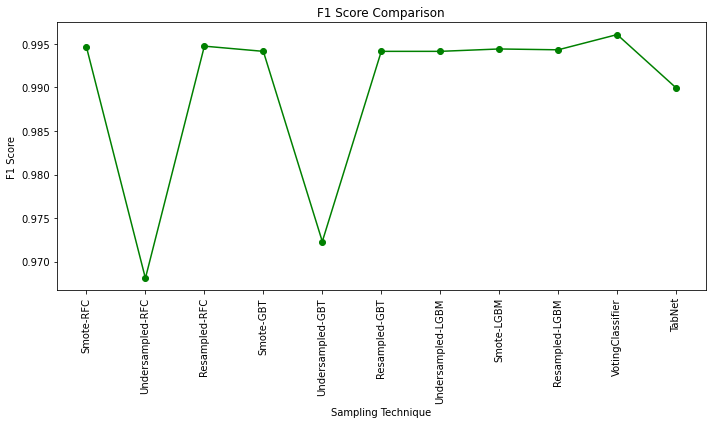

In [29]:
precision_values = metrics_df['Precision']
recall_values = metrics_df['Recall']
f1_values = metrics_df['F1 Score']
models = metrics_df['Sampling Technique']

sns.set(style="whitegrid")

# Plotting Precision
plt.figure(figsize=(10, 6))
plt.plot(models, precision_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Technique')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
plt.plot(models, recall_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Technique')
plt.ylabel('Recall Score')
plt.title('Recall Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 6))
plt.plot(models, f1_values, marker='o', linestyle='-', color='green')
plt.xlabel('Technique')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()